# Data Understanding: Exploratory Data Anaylsis

This notebook was strictly used for Exploratory Data Analysis (EDA) purposes.

## Import Relevant Libraries and Import Dataset

In [66]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('Terry_Cleaned.csv')
df.head() # Reveal the first 5 rows of the dataframe

,Unnamed: 0,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,0,26 - 35,Arrest,1984,M,Black or African American,Asian,Male,SOUTH PCT 1ST W - ROBERT,0,0,0,0,2015
1,1,26 - 35,Field Contact,1965,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
2,2,26 - 35,Field Contact,1961,M,White,White,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
3,3,26 - 35,Field Contact,1963,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
4,4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015


In [68]:
df = df.drop(['Unnamed: 0'], axis=1) # Drop the "Unnamed: 0" column that was added when the dataframe was saved as a CSV.
df.head() 

,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,26 - 35,Arrest,1984,M,Black or African American,Asian,Male,SOUTH PCT 1ST W - ROBERT,0,0,0,0,2015
1,26 - 35,Field Contact,1965,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
2,26 - 35,Field Contact,1961,M,White,White,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
3,26 - 35,Field Contact,1963,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015


## EDA

In [69]:
# EDA Shortcut
profile = ProfileReport (df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

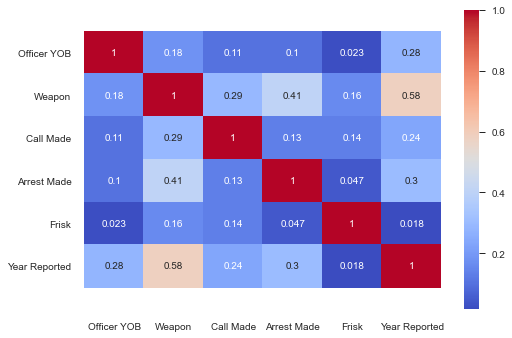

In [70]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')  #Heatmap with Correlations overlaid on features.

# Scale the Heat Map, so the correlation values are centered and ledgeable
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

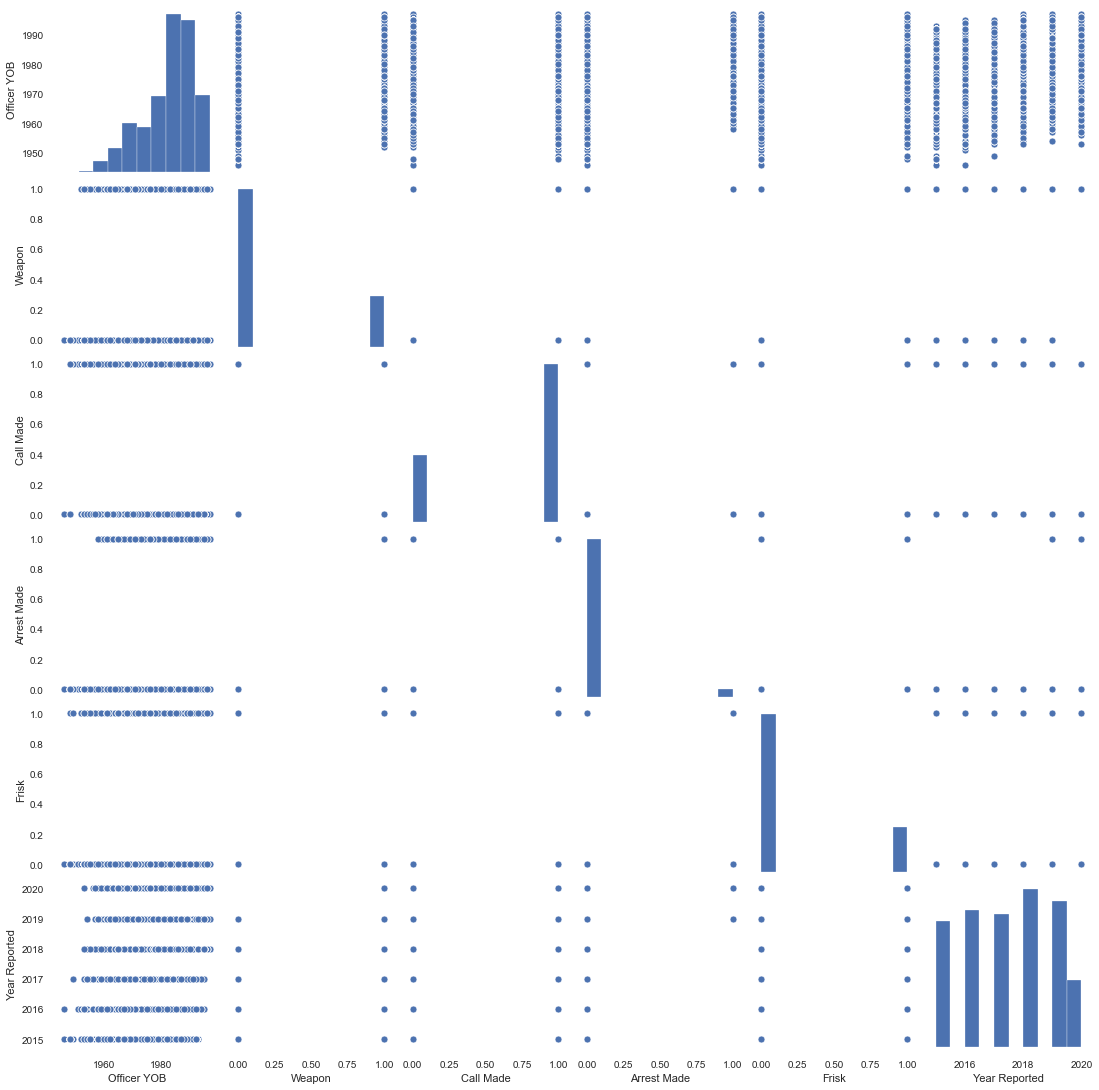

In [71]:
sns.pairplot(df) # Shows the visual relations between all features

### Questions for Analysis

### Questions 1: How do demographics influence the outcomes of community policing?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

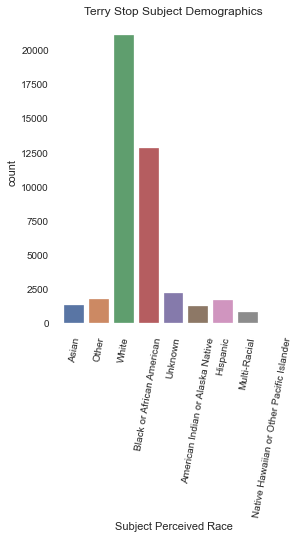

In [72]:
fig = plt.gcf() # Gets a reference to the current figure when using pyplot. Similar to figure()
fig.set_size_inches(20, 17) # Sets size of the plot
sns.catplot(x= 'Subject Perceived Race', kind='count', data=df) # Plots a countplot- a histogram across categorical variables
plt.title("Terry Stop Subject Demographics")
plt.xticks(rotation=80) #Rotate x-labels so that the labels do not overlap


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

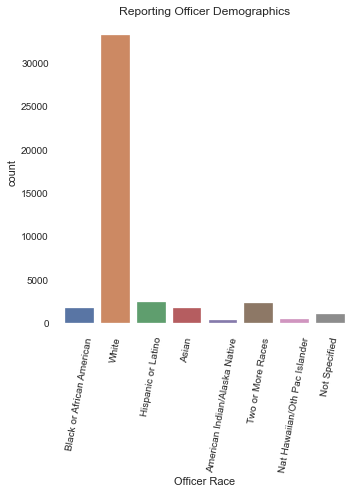

In [73]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Race', kind='count', data=df)
plt.title("Reporting Officer Demographics")
plt.xticks(rotation=80)

In [74]:
# Check the amount of Black people arrested per age group by White officers
df.loc[(df['Officer Race'] == 'White') & (df['Subject Perceived Race'] == 'Black or African American')]

,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
5,26 - 35,Field Contact,1973,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
16,26 - 35,Field Contact,1959,M,White,Black or African American,Male,WEST PCT 2ND W - MARY BEATS,0,0,0,1,2015
42,26 - 35,Field Contact,1986,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
45,26 - 35,Field Contact,1986,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43045,56 and Above,Field Contact,1996,M,White,Black or African American,Male,NORTH PCT 3RD W - B/N RELIEF,1,1,0,0,2020
43055,56 and Above,Field Contact,1976,F,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,1,1,0,1,2020
43056,56 and Above,Field Contact,1968,M,White,Black or African American,Male,NORTH PCT 2ND W - NORA,1,1,0,0,2020
43058,56 and Above,Offense Report,1992,M,White,Black or African American,Male,WEST PCT 3RD W - KING,1,1,0,0,2020


#### Findings:

Seattle is 70% White and 51% male. Black/African Americans make up 6.1% of Seattle's Population, but make up 1/3 of the Terry Stop subjects.

In [75]:
# Group dataframe by officer YOB, race, and subject race
df.groupby(['Officer YOB', 'Officer Race', 'Subject Perceived Race']).median().head()

Weapon  Call Made  \
Officer YOB Officer Race Subject Perceived Race                         
1946        Asian        Black or African American     0.0        0.0   
                         White                         0.0        0.0   
1948        White        Asian                         0.0        1.0   
                         Black or African American     0.0        0.0   
                         Hispanic                      0.0        1.0   

                                                    Arrest Made  Frisk  \
Officer YOB Officer Race Subject Perceived Race                          
1946        Asian        Black or African American          0.0    0.0   
                         White                              0.0    0.0   
1948        White        Asian                              0.0    0.0   
                         Black or African American          0.0    0.0   
                         Hispanic                           0.0    1.0   

                                                    Year Reported  
Officer YOB Officer Race Subject Perceived Race                    
1946        Asian        Black or African American         2016.0  
                         White                             2015.0  
1948        White        Asian                             2015.0  
                         Black or African American         2015.0  
                         Hispanic                          2015.0

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

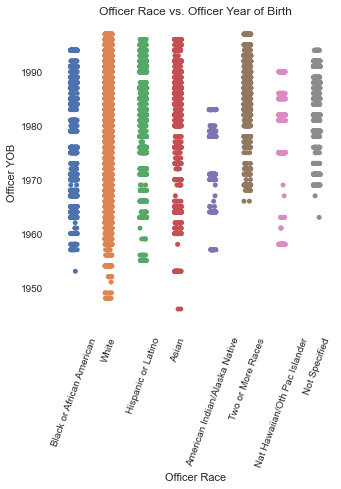

In [76]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(y='Officer YOB', x='Officer Race', data=df)
plt.title("Officer Race vs. Officer Year of Birth")
plt.xticks(rotation=70)


#### Findings:

The average age of the officers on duty were born in the year 1982, while the oldest reporting officers was born in 1946 and the youngest officers were born in 1997.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

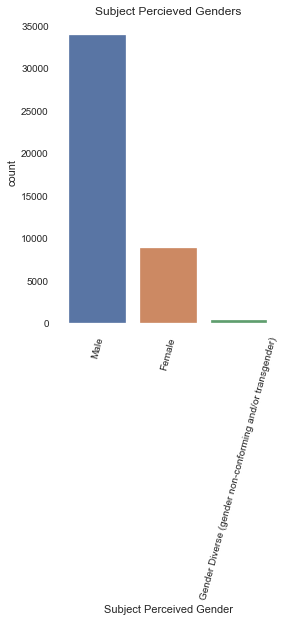

In [77]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Subject Perceived Gender', kind='count', data=df)
plt.title("Subject Percieved Genders")
plt.xticks(rotation=75)


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

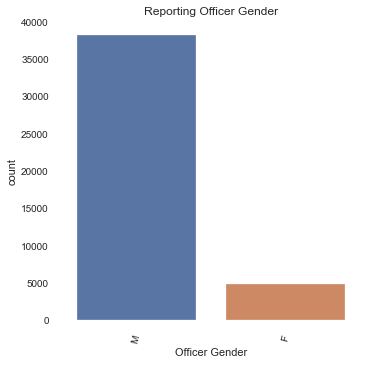

In [78]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Gender', kind='count', data=df)
plt.title("Reporting Officer Gender")
plt.xticks(rotation=75)

In [79]:
# Import Uncleaned DataFrame to use columns (Call Type and Beat) that were cut from Modeling
eda_df = pd.read_csv('Terry_Cleaned_forEDA.csv') 
eda_df = eda_df.drop(['Unnamed: 0'], axis=1)
eda_df.head()



,Subject Age Group,Stop Resolution,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Beat,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,26 - 35,Arrest,7500,1984,M,Black or African American,Asian,Male,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,O2,0,0,0,0,2015
1,26 - 35,Field Contact,5670,1965,M,White,Other,Male,07:59:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
2,26 - 35,Field Contact,4844,1961,M,White,White,Male,19:12:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
3,26 - 35,Field Contact,7539,1963,M,White,Other,Male,04:55:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
4,26 - 35,Field Contact,6973,1977,M,White,Black or African American,Male,00:41:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015


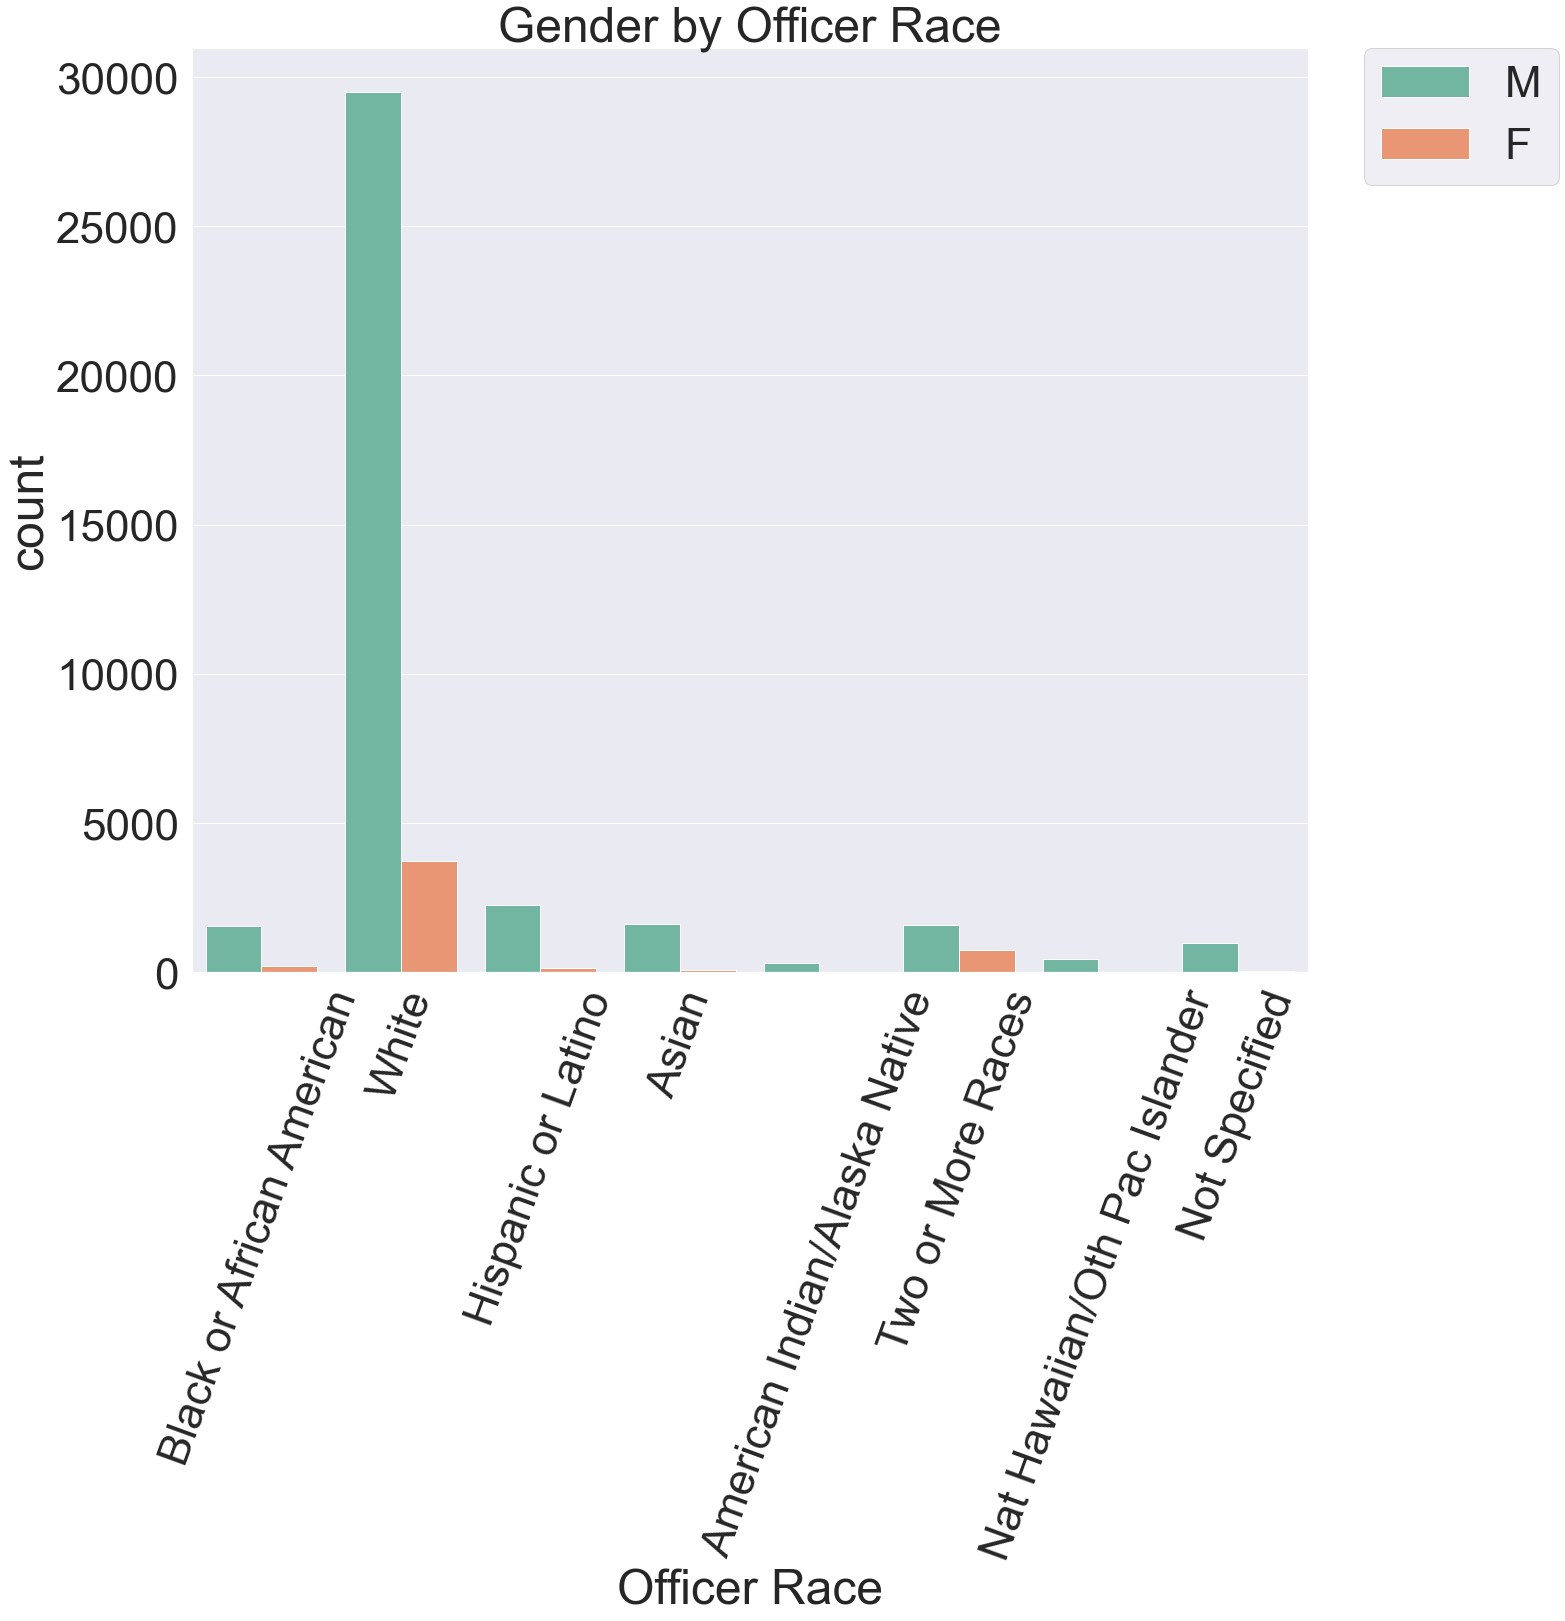

In [80]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4) # Set font on the plot
sns.countplot(x='Officer Race', hue='Officer Gender', data=eda_df, palette="Set2") # Plot officer race by gender
plt.title('Gender by Officer Race')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Moves the key/legend outside of the plot, so it does not block views to the data



#### Findings:

Seattle is 49% Female, however subjects who identify as women make up 20% of the Terry Stop subjects. 88% of the officers identify as male.

#### Recommendations & Insights
For community policing to be effective, the police force should at a minimum be representative of the total population for that city and/or Precinct. Programs should be started to recruit more minorities and women to be police officers and representatives of the law. Minority representation within the law will help well intentioned laws from unfairly targeting People of Color. With so few women being stopped, it raises the questions;
1. Are women generally seen as less threatening by society? 
2. Because of this, do officers often let their guards down around women? 
3. Could this be a blind spot for the police force and for residents?

In [81]:
# How often do police officers initiate stops without calls being made?

df.groupby(['Officer Race', 'Subject Perceived Race', 'Call Made']).median().head()

Officer YOB  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0               1964.0   
                                                               1               1979.0   
                              Asian                            0               1978.0   
                                                               1               1978.0   
                              Black or African American        0               1978.0   

                                                                          Weapon  \
Officer Race                  Subject Perceived Race           Call Made           
American Indian/Alaska Native American Indian or Alaska Native 0             0.0   
                                                               1             0.0   
                              Asian                            0             0.0   
                                                               1             0.0   
                              Black or African American        0             0.0   

                                                                          Arrest Made  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0                  0.0   
                                                               1                  0.0   
                              Asian                            0                  0.0   
                                                               1                  0.0   
                              Black or African American        0                  0.0   

                                                                          Frisk  \
Officer Race                  Subject Perceived Race           Call Made          
American Indian/Alaska Native American Indian or Alaska Native 0            0.0   
                                                               1            0.0   
                              Asian                            0            0.0   
                                                               1            1.0   
                              Black or African American        0            0.0   

                                                                          Year Reported  
Officer Race                  Subject Perceived Race           Call Made                 
American Indian/Alaska Native American Indian or Alaska Native 0                 2015.0  
                                                               1                 2015.0  
                              Asian                            0                 2016.0  
                                                               1                 2018.0  
                              Black or African American        0                 2016.0

### Question 2: On what basis are “hunches made”? What factors influence these instincts, and how do those instincts impact residents.


In [82]:
# Group frisks and arrests by race.
df.groupby(['Subject Perceived Race', 'Frisk', 'Arrest Made']).median().head()

Officer YOB  Weapon  \
Subject Perceived Race           Frisk Arrest Made                        
American Indian or Alaska Native 0     0                 1984.0     0.0   
                                       1                 1989.0     1.0   
                                 1     0                 1985.0     0.0   
                                       1                 1992.0     1.0   
Asian                            0     0                 1985.0     0.0   

                                                    Call Made  Year Reported  
Subject Perceived Race           Frisk Arrest Made                            
American Indian or Alaska Native 0     0                  1.0         2017.0  
                                       1                  1.0         2019.0  
                                 1     0                  1.0         2017.0  
                                       1                  1.0         2019.0  
Asian                            0     0                  1.0         2017.0

In [83]:
# Delete rows where the call type equals '-'
call_null = eda_df.loc[(eda_df['Call Type'] == '-')] # Find all Call Types listed as '-'
indices_todrop = call_null.index # Find the indices 
eda_df.drop(indices_todrop, axis=0, inplace=True) # Drop the rows by index

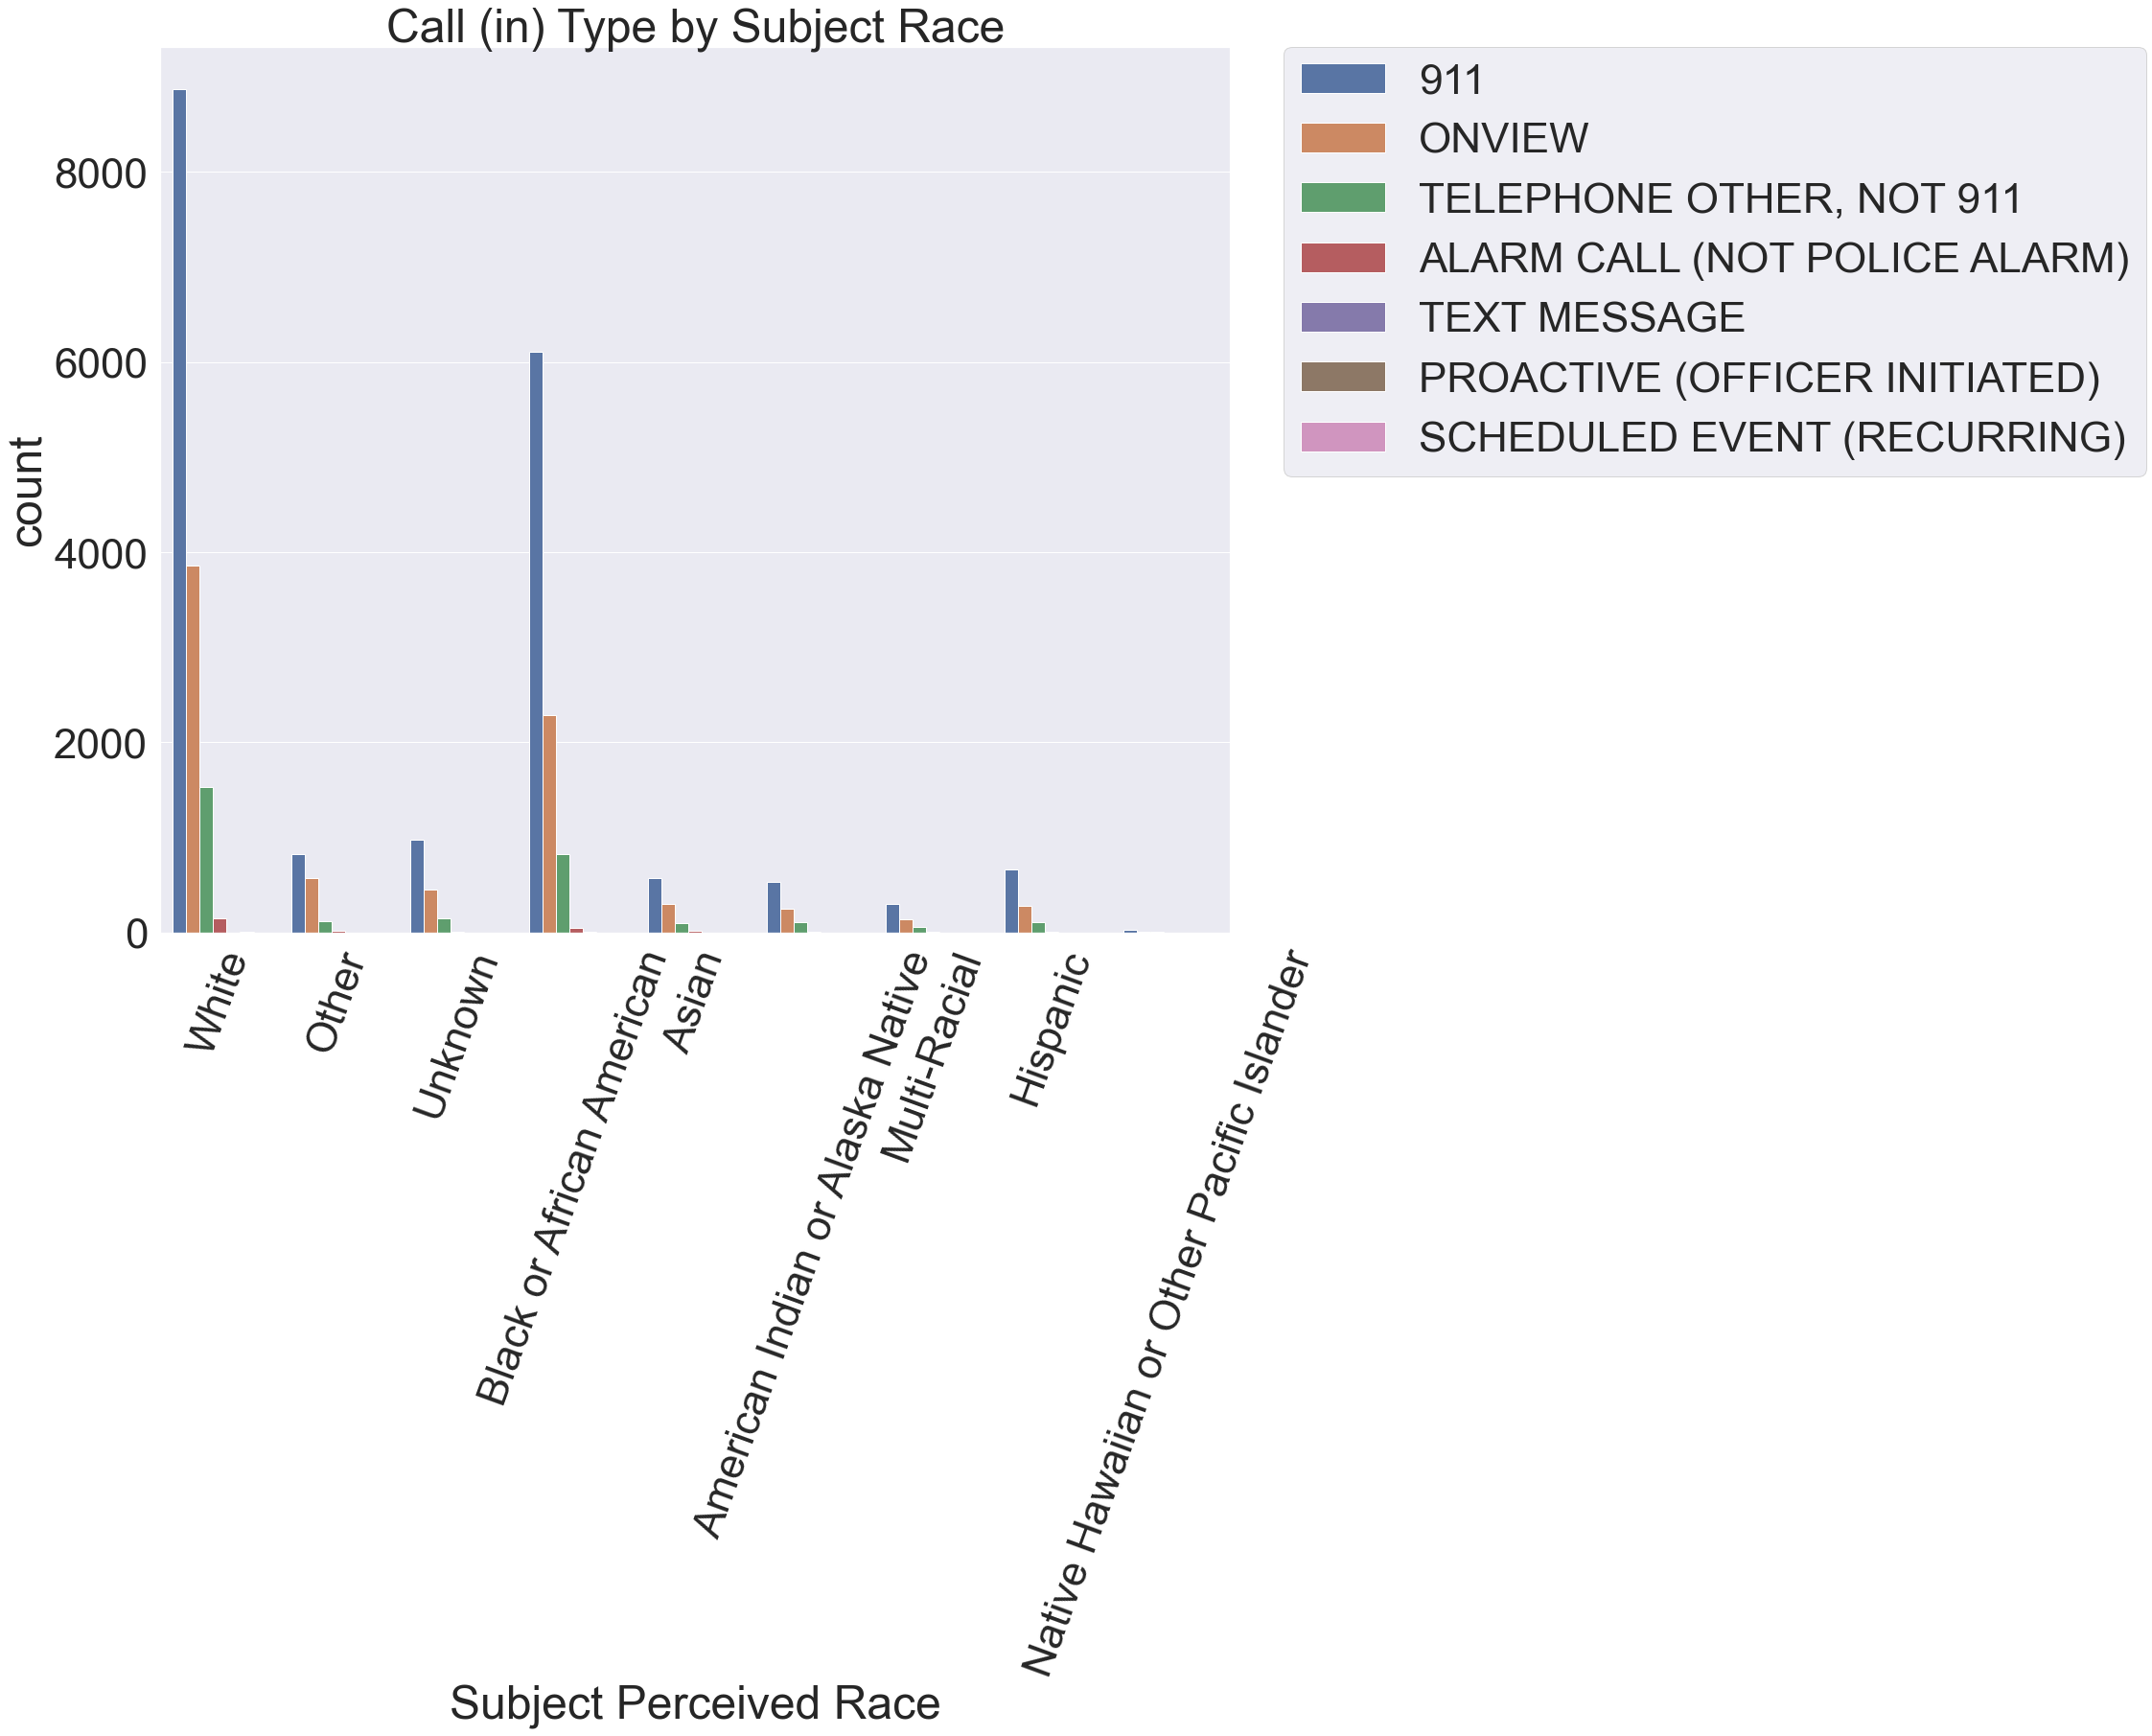

In [84]:
# Call Types by Subject Race
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Subject Perceived Race', hue='Call Type', data=eda_df) # Plot "Call Type" by subject race
plt.title('Call (in) Type by Subject Race')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [85]:
# Check the count of Seattle PD Beat locations, for the top 5 beat
eda_df['Beat'].value_counts()

N3        1020
-         1014
E2         973
M2         734
M3         685
          ... 
C2          50
N1          47
99          45
99          24
OOJ         18
Name: Beat, Length: 106, dtype: int64

In [86]:
# Find the top 2 Initial Call Type reasons
eda_df['Initial Call Type'].value_counts(normalize=True)

SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.092760
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.088332
DISTURBANCE, MISCELLANEOUS/OTHER                  0.073527
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.059218
TRESPASS                                          0.056211
                                                    ...   
ANIMAL, REPORT - BITE                             0.000033
VICE - PORNOGRAPHY                                0.000033
-ASSIGNED DUTY - STAKEOUT                         0.000033
DEMONSTRATIONS                                    0.000033
MISSING - (ALZHEIMER, ENDANGERED, ELDERLY)        0.000033
Name: Initial Call Type, Length: 160, dtype: float64

In [87]:
# Find the most common initial call type
eda_df['Initial Call Type'].mode()

0    SUSPICIOUS STOP - OFFICER INITIATED ONVIEW
dtype: object

In [88]:
# Find all rows where the Initial Call Type was "Suspicious Stop"
susp = eda_df.loc[(eda_df['Initial Call Type'] == 'SUSPICIOUS STOP - OFFICER INITIATED ONVIEW')] 
susp_per = eda_df.loc[(eda_df['Initial Call Type'] == 'SUSPICIOUS PERSON, VEHICLE OR INCIDENT')] 



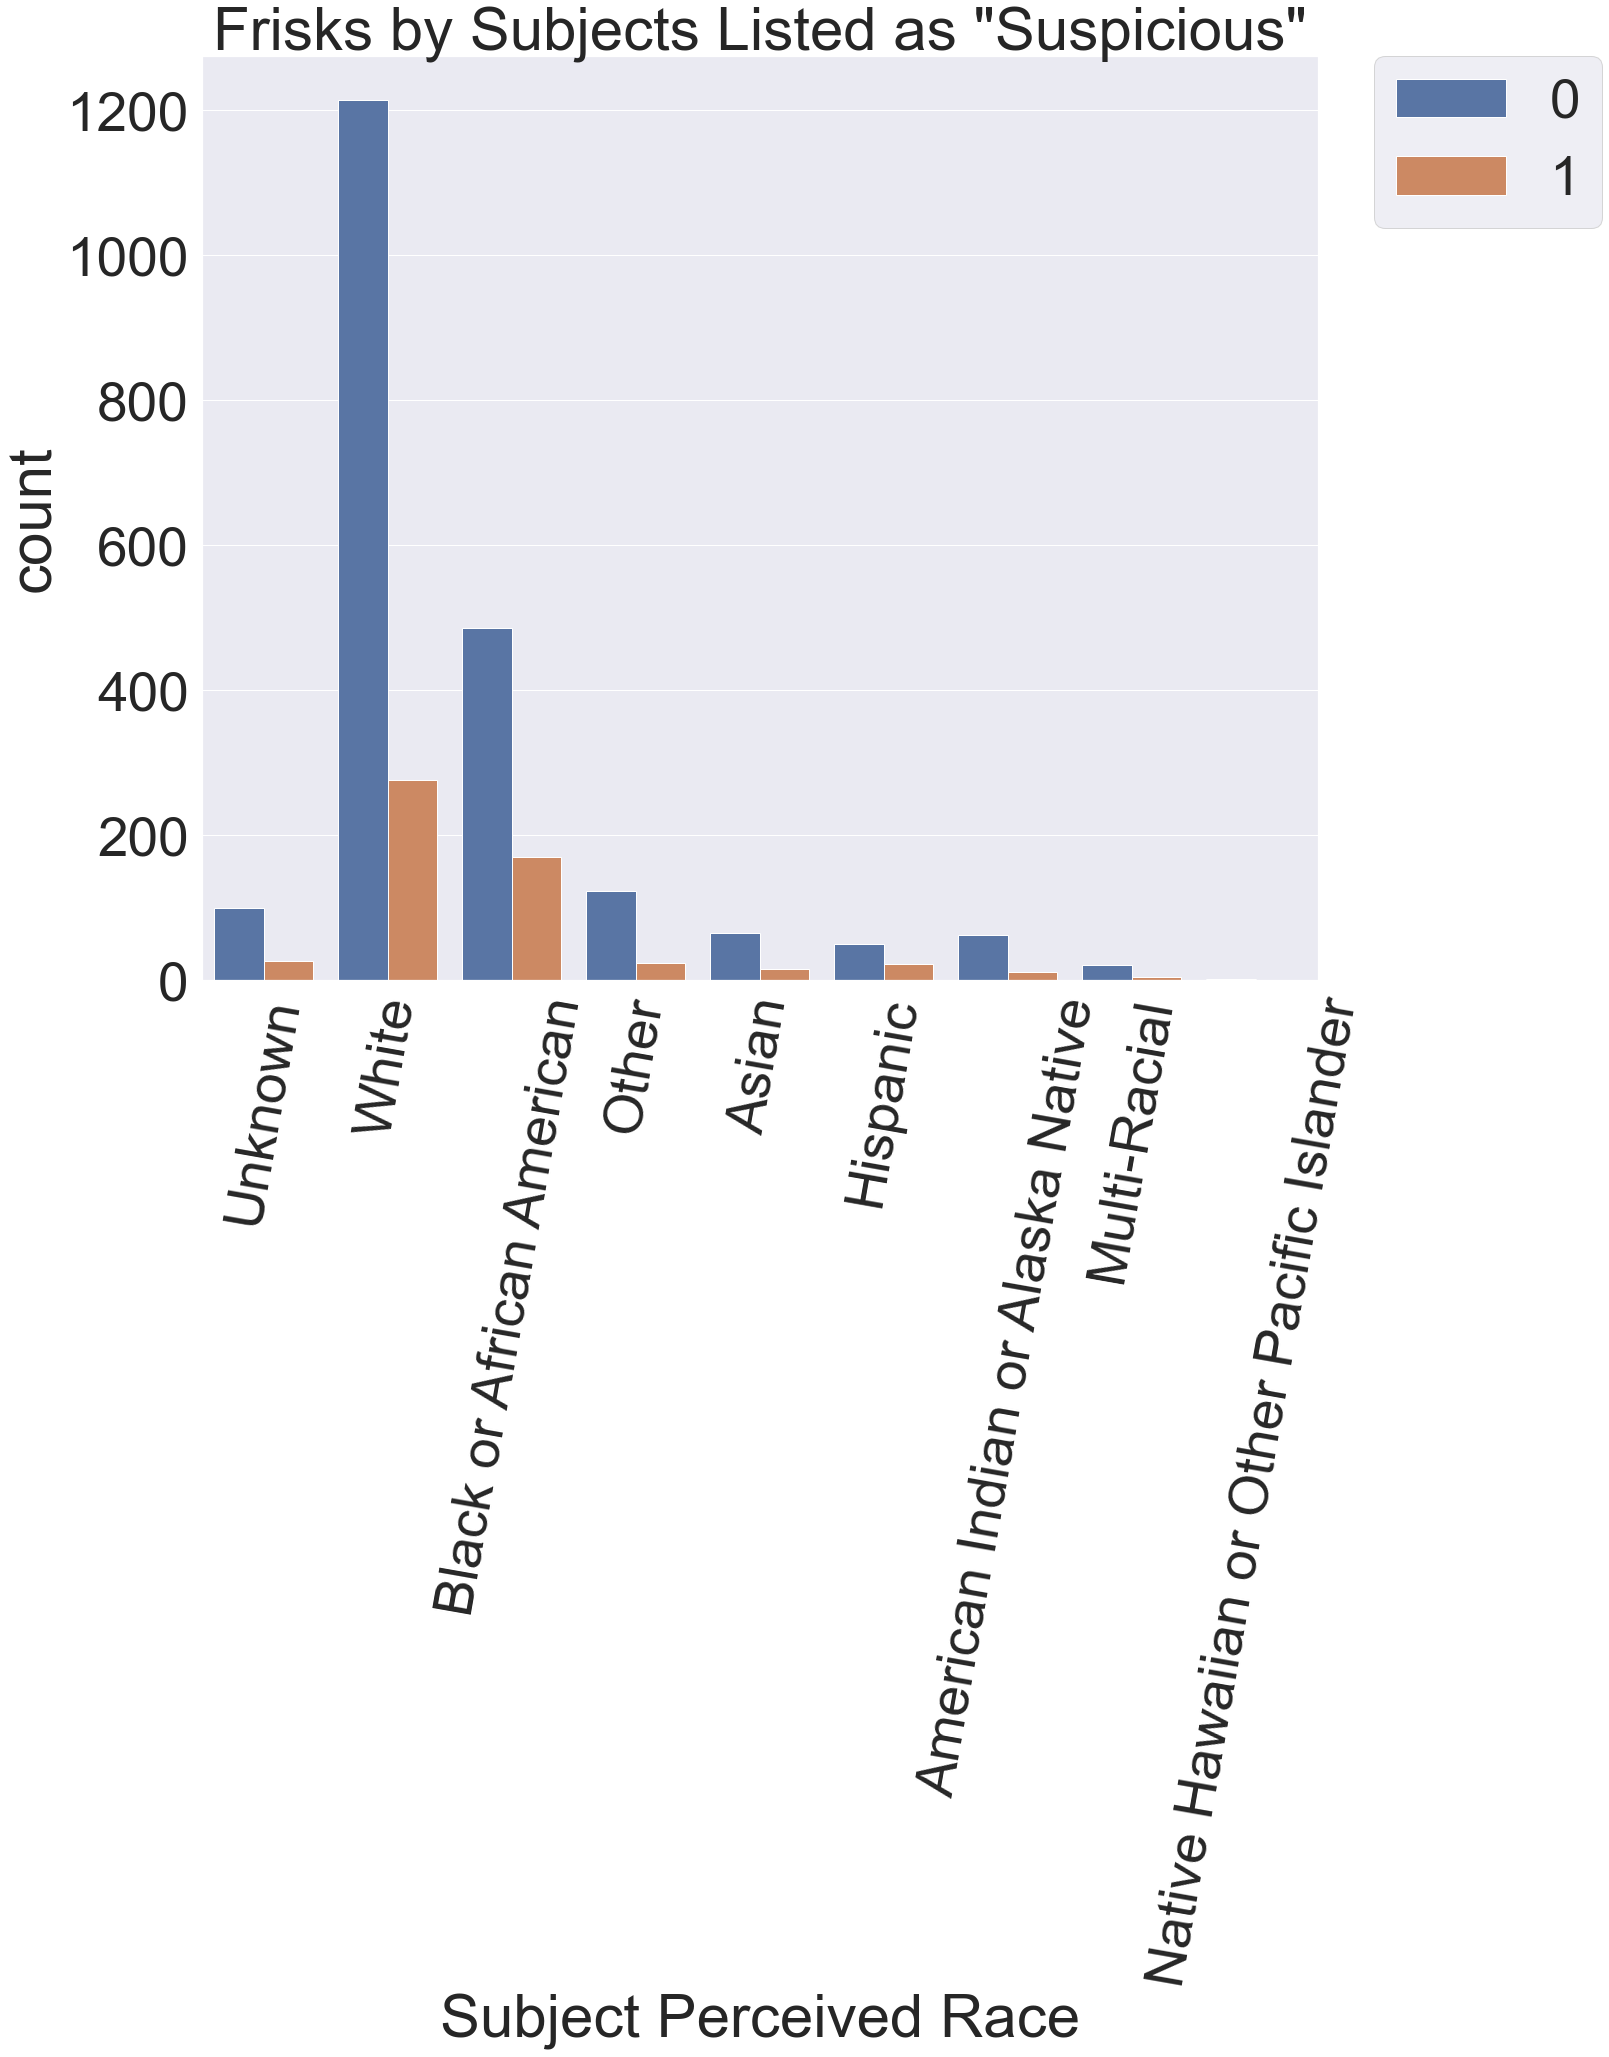

In [89]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=5)
sns.countplot(x='Subject Perceived Race', hue='Frisk', data=susp_per)
plt.title('Frisks by Subjects Listed as "Suspicious"')
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

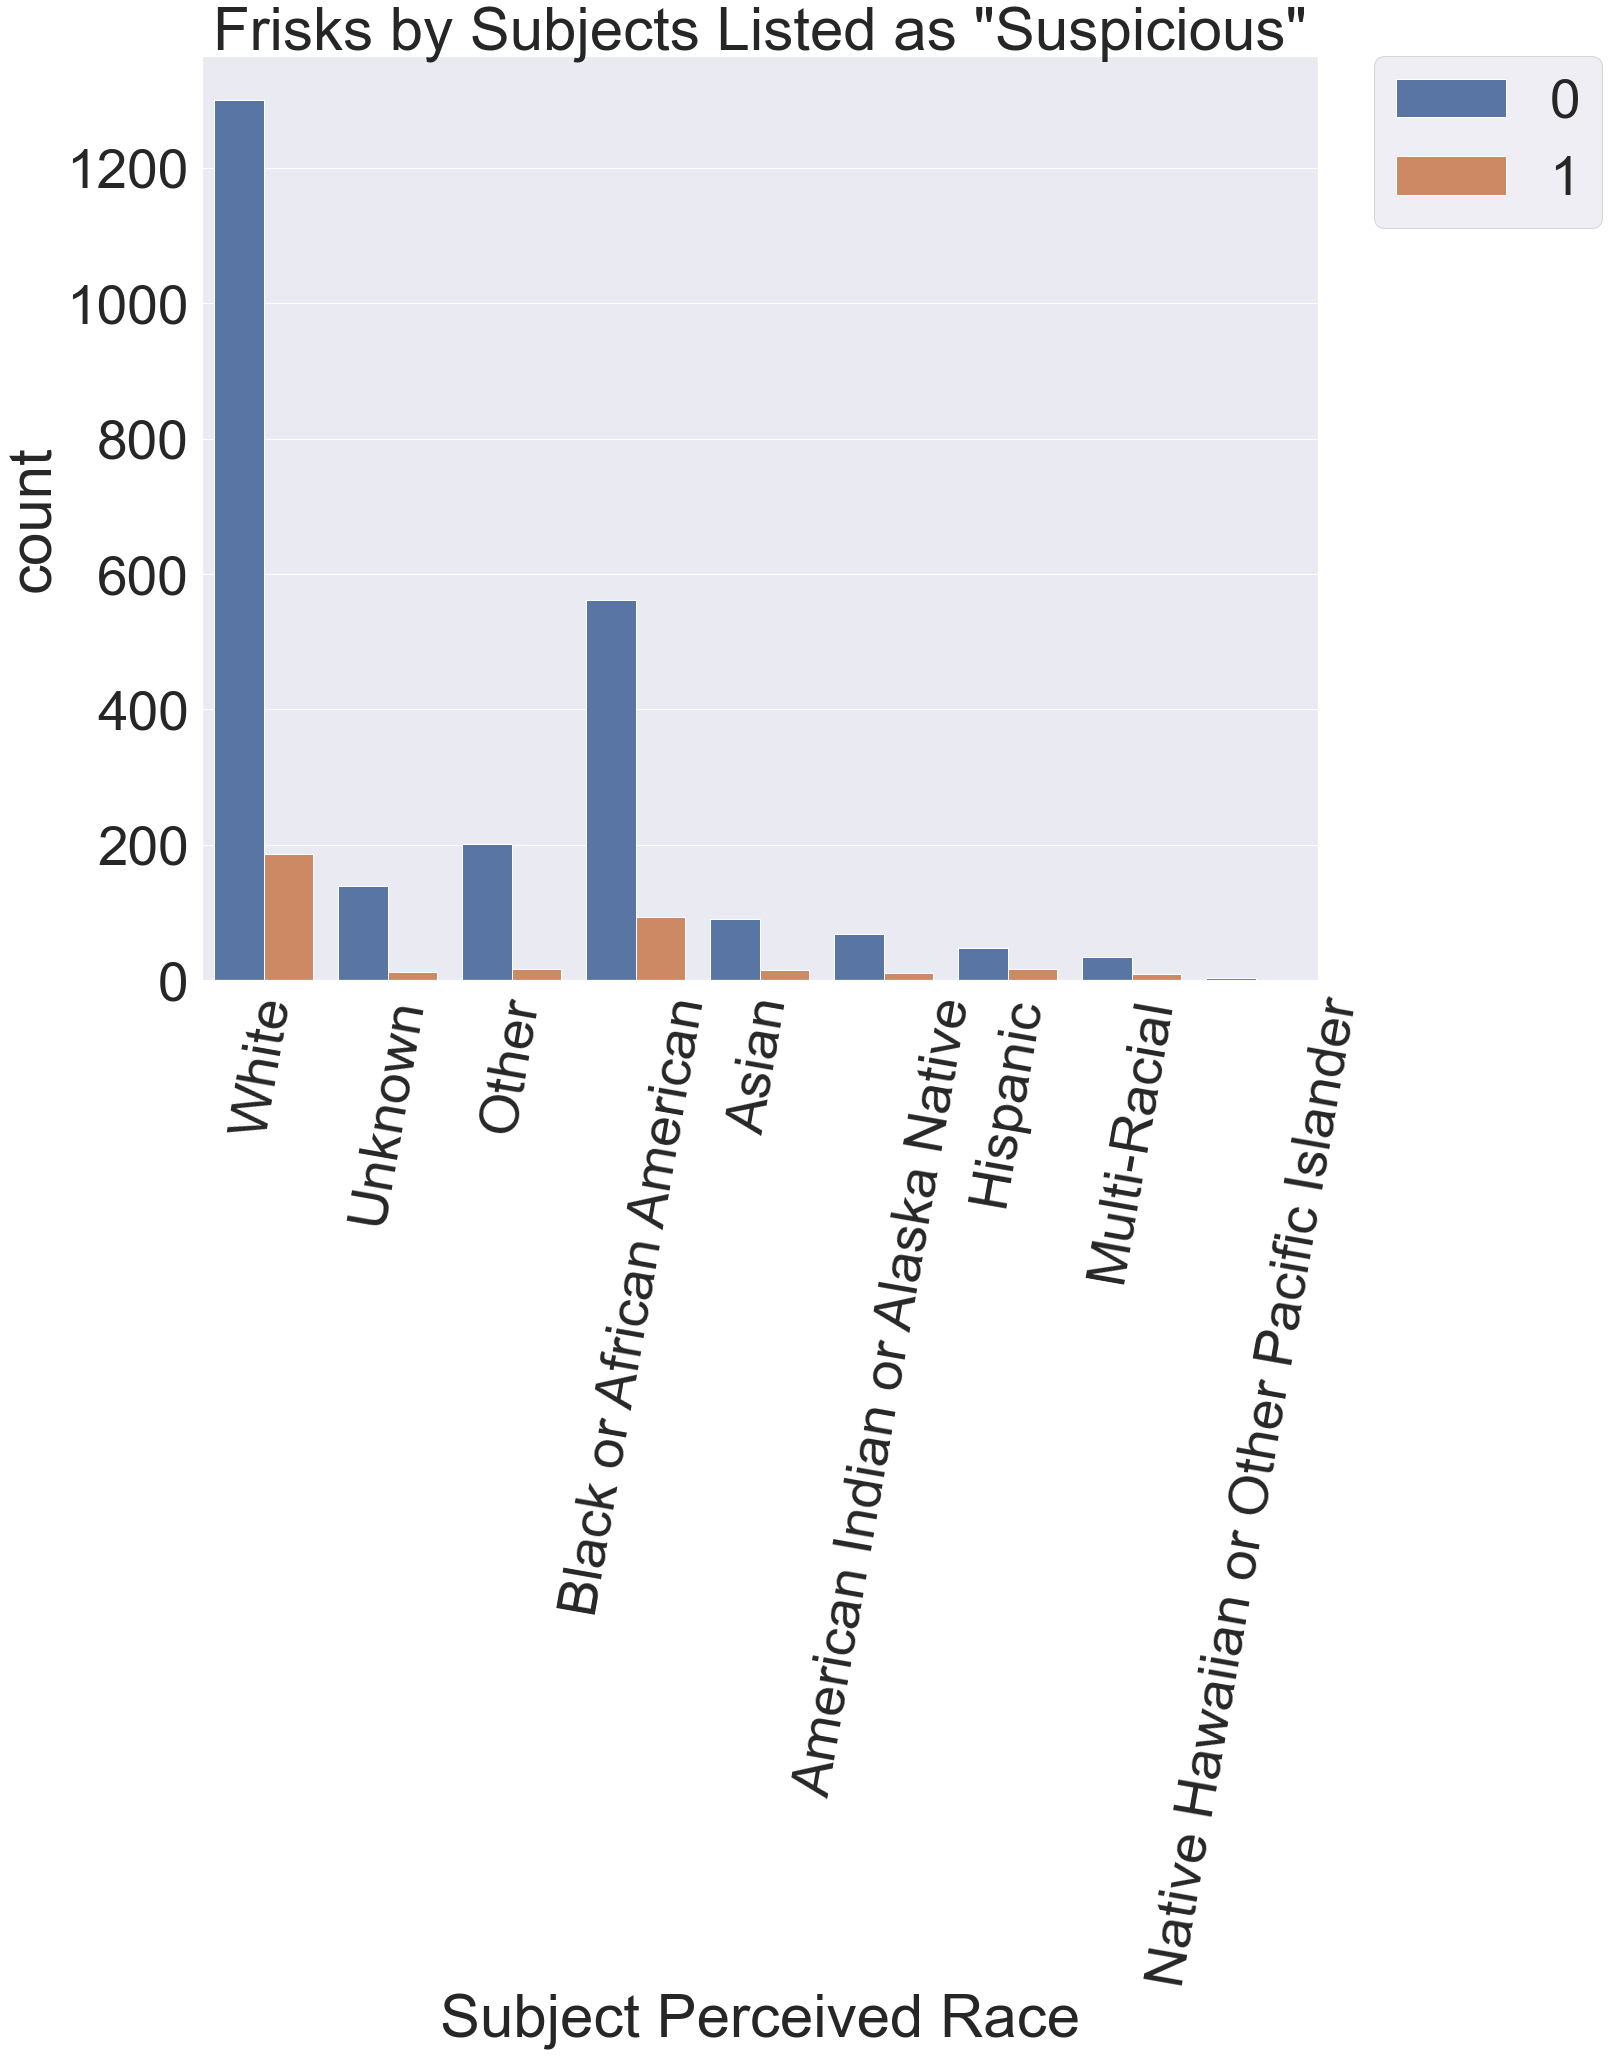

In [90]:

fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=5)
sns.countplot(x='Subject Perceived Race', hue='Frisk', data=susp)
plt.title('Frisks by Subjects Listed as "Suspicious"')
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Findings: 

The most common reported 911 calls and the top reason for Onview (police field stops- stops not initiated by calls) were categorized as “Suspicious Person”. The majority of all stops made came from the N3 (the North Precinct) and E2 (the East Precinct) Beats. These are predominately white areas in Seattle.

#### Recommendations & Insights
The data here raises many questions, namely; 
1. "How is “Suspicious” defined by Seattle police departments?”
2.  “Is the criteria measurable and trainable?”
3.  “Does it look the same across genders and races?"
4.  How do we as a society define what is threatening or suspicious activity for a man vs a woman. How do these views contribute to the amount of people who “get away”? 
5. Do these criteria vary by age group or is it something else?
6. How does an officer's demeaner affected when he or she hears the phrase "supicious suspect"?
7. How are the lines drawn between "a hunch", instinct, and bias?

911 Dispatchers and officers should be enrolled in annual implicit bias training. This is pertinent for dispatchers because as the messengers and classifiers of the calls, they should be trained in asking the proper questions to identify whether actual threats are imminent or if bias is the culprit. These fielding questions will save officers time and prevent potential violence against pedestrians who are not carrying or committing a crime. In addition officer health plans should be expanded to include therapy. Officers need a medium to deal with stress, rage, and anxiety so that those emotions do not manifest themselves into their work dealing with the citizens that they are tasked with protecting. Lastly, police officers should be partnered with licensed counselors to deal with abuse victims, individuals with mental health issues who may be exhibiting "suspicious behavior", and to check officer biases in real time. 

### Question 3: What common age groups are stopped? Are they weapon's carriers? 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

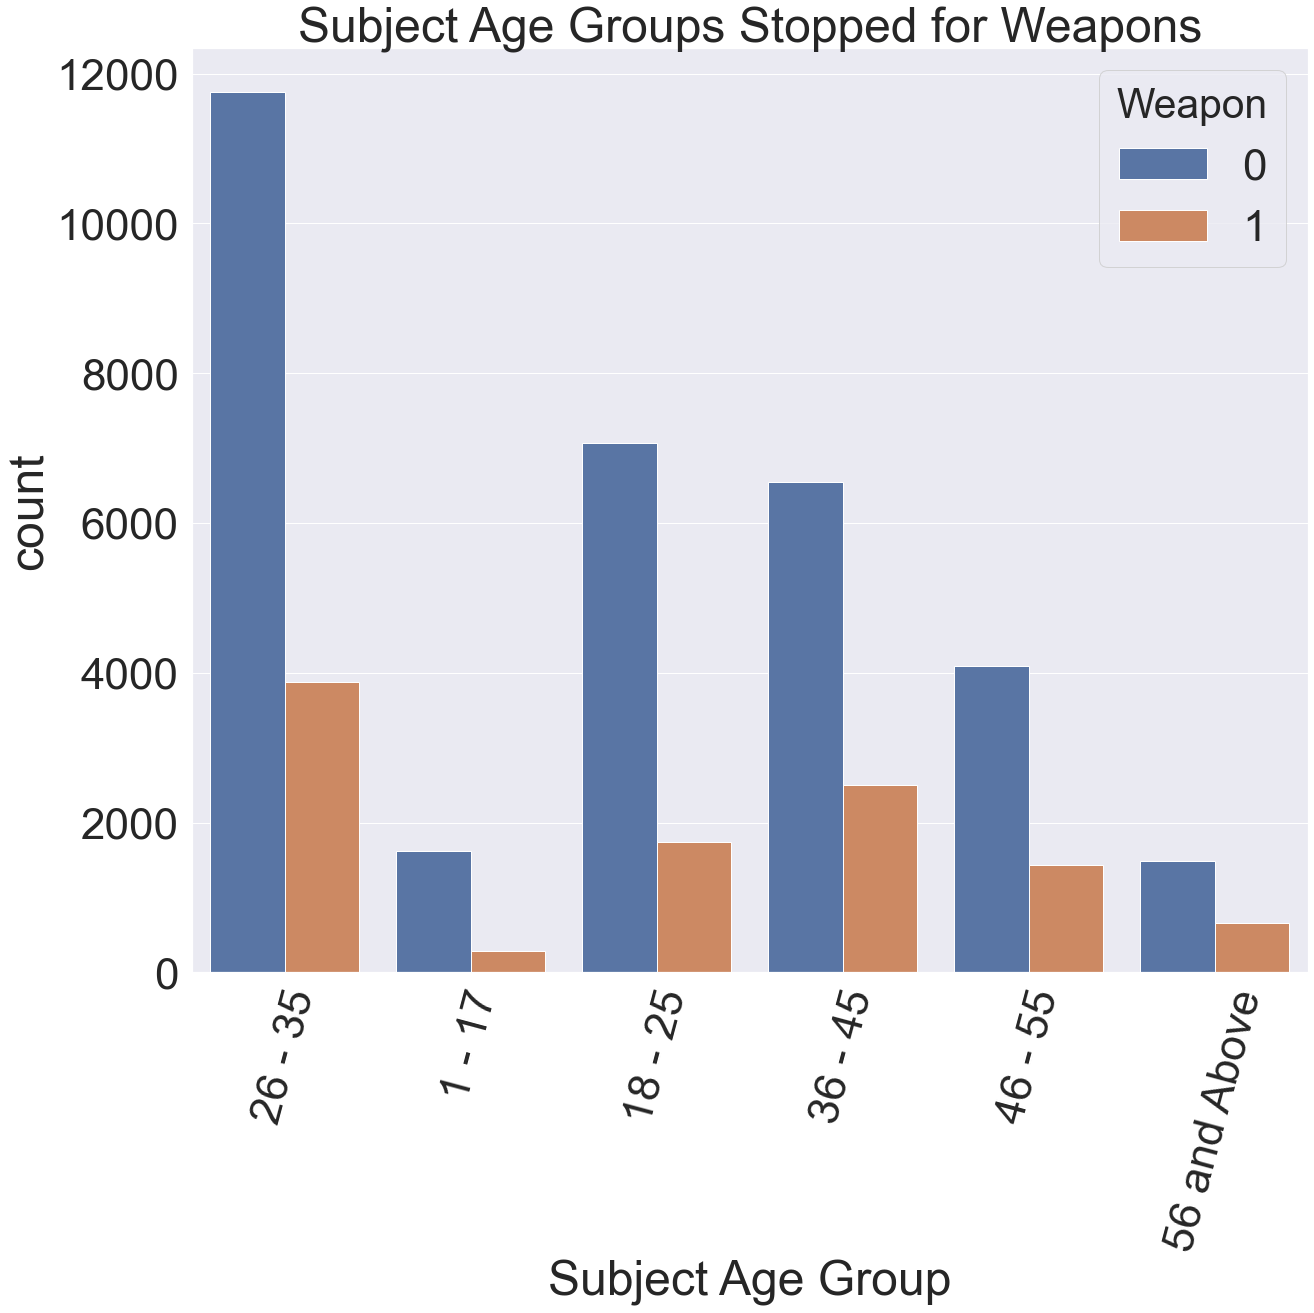

In [91]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Subject Age Group', hue= 'Weapon', data=df)
plt.title("Subject Age Groups Stopped for Weapons")
plt.xticks(rotation=75)


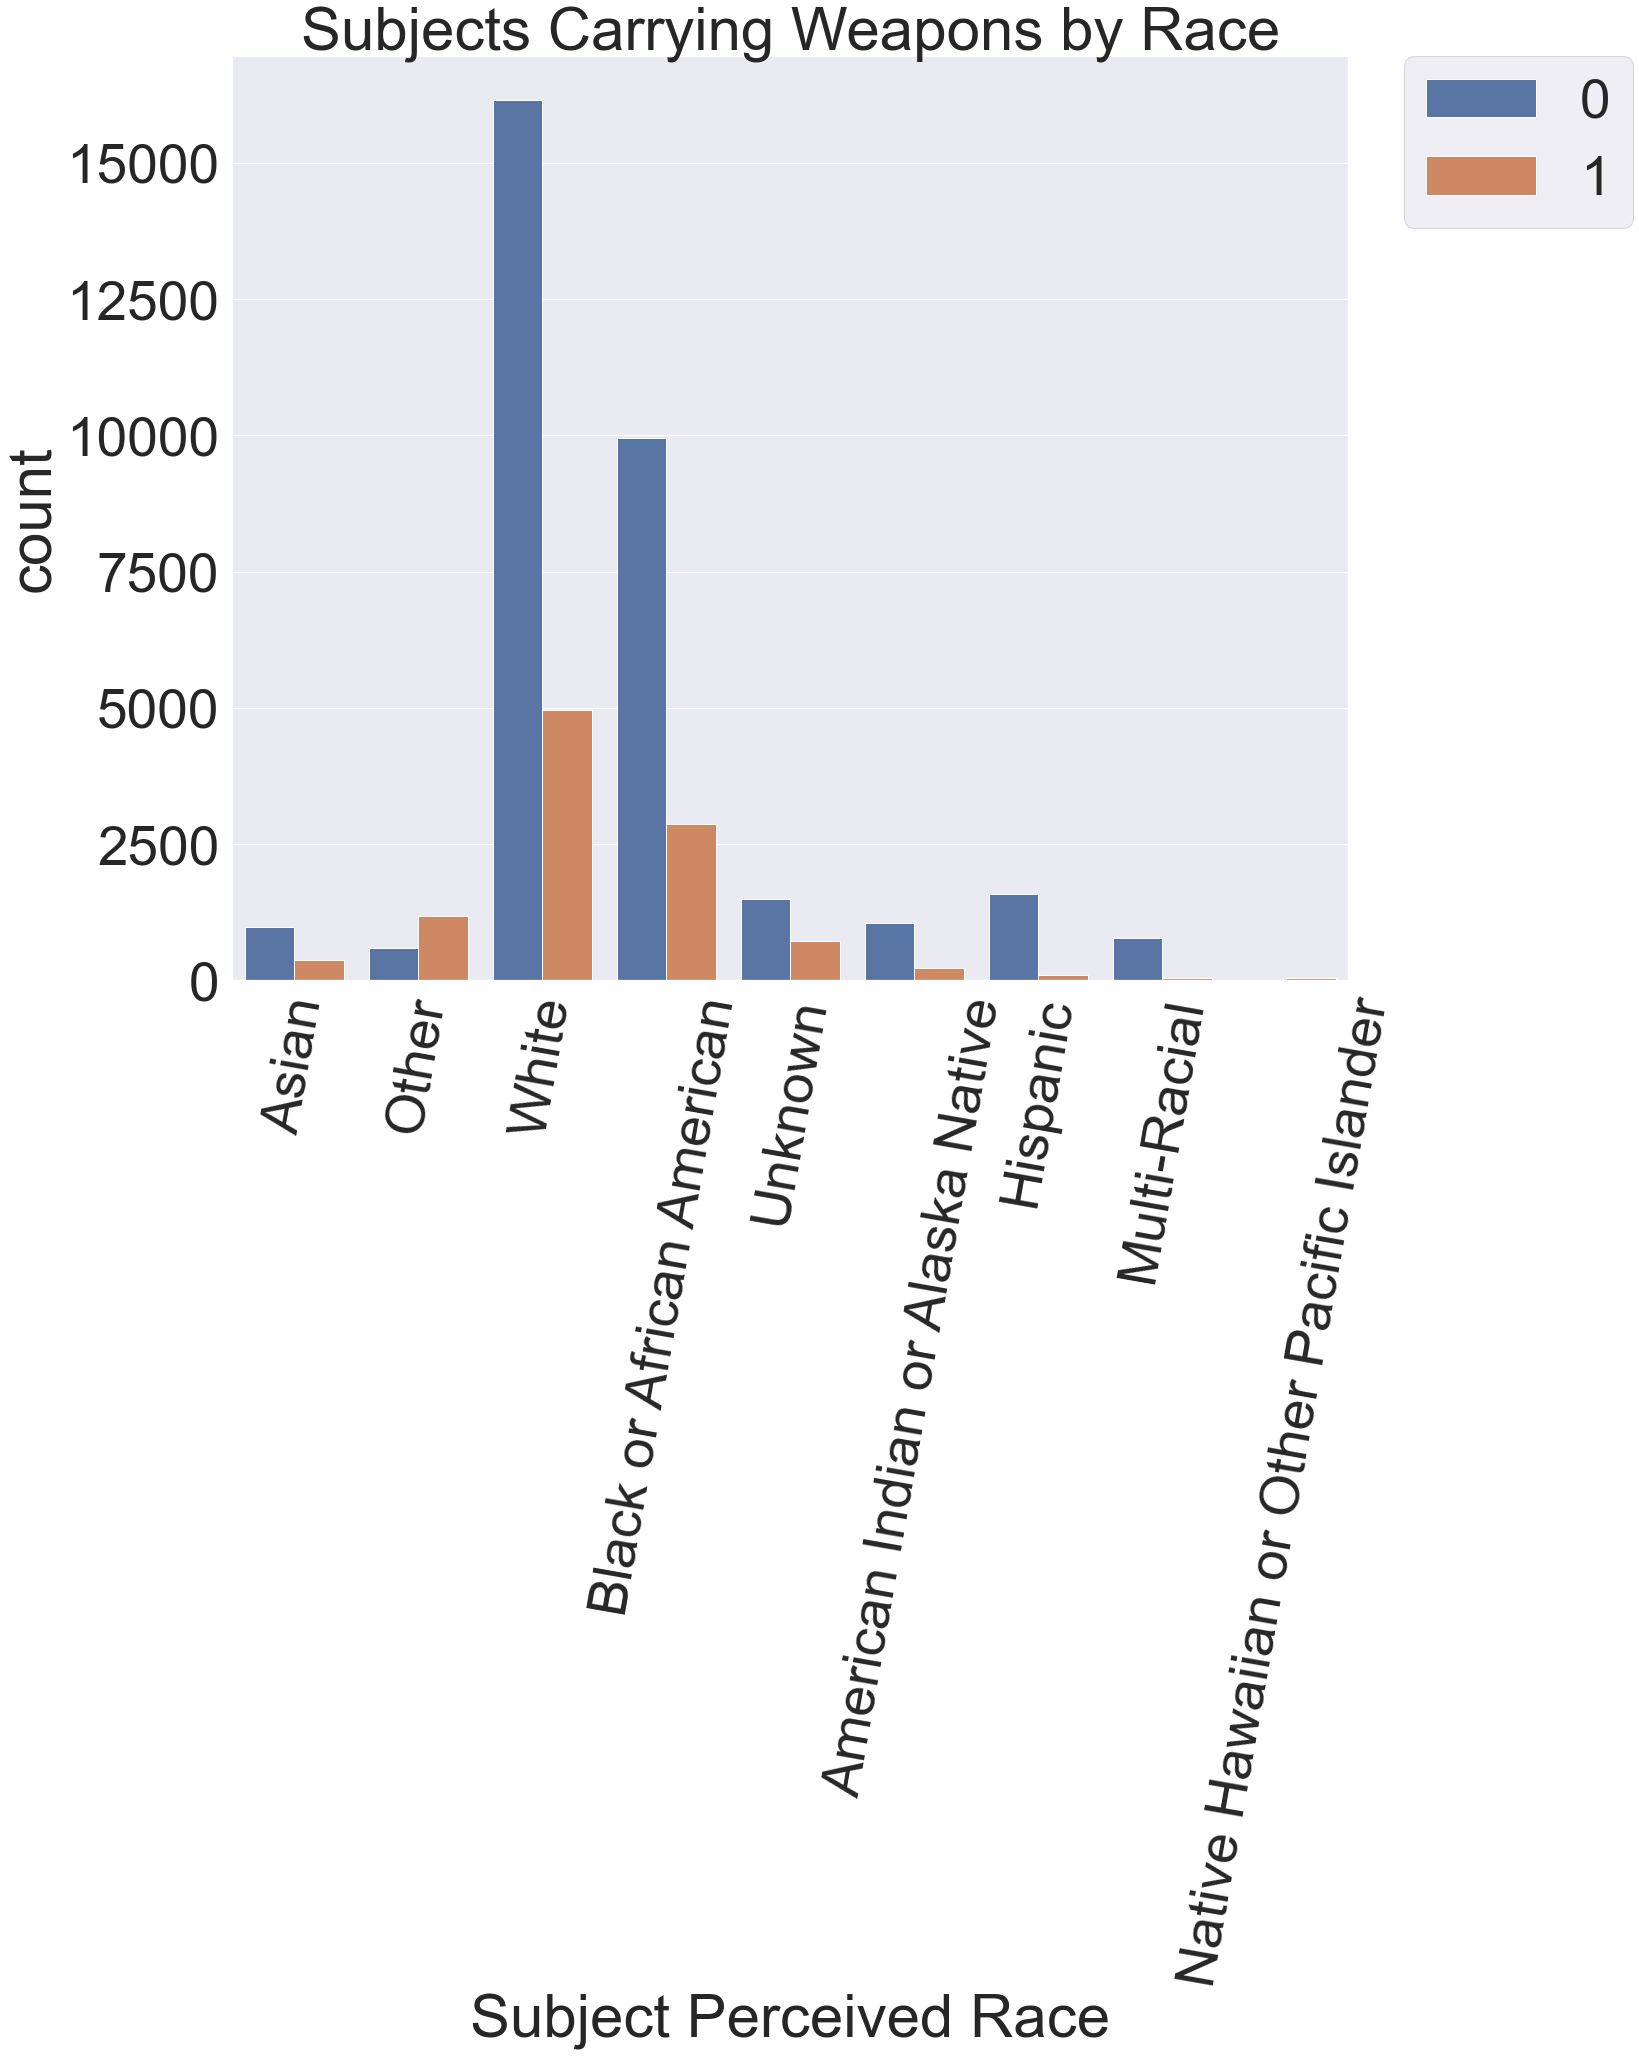

In [92]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=5)
sns.countplot(x='Subject Perceived Race', hue='Weapon', data=df)
plt.title('Subjects Carrying Weapons by Race')
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




#### Findings:

Subjects ages 26 - 35 years old were the most stopped age group, totaling 1/3 of the dataset. This age group had the most weapons found on their person. Teenagers were also subject to Terry Stops. A little over 1500 children ranging from 1 - 17, and less than 1/4 of them were found to be carrying weapons. The gun laws in the state of Washington are stricter on purchasing and possessing long guns and semiautomatic weapons, which requires a person to be at least 21 years of age, however it is still largely open to interpretation.

#### Recommendations & Insights
The age to purchase and possess weapons of any kind should be set at 21 years old. Weapons purchasing and possession should also be restricted to households who have children under the age of 18 in the home. 

### Conclusion:

The cost of these new measures will offset the costs of class action lawsuits for harassment & profiling, civil rights violations, and wrongful death suits.